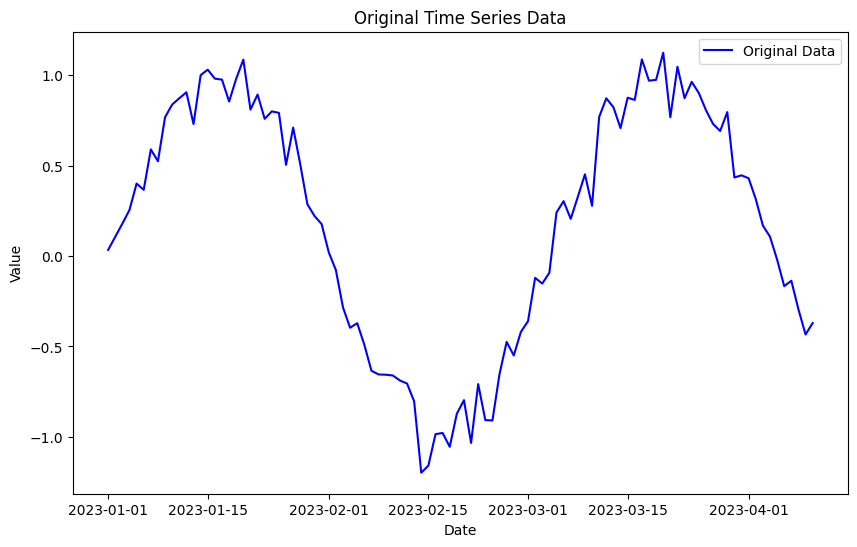

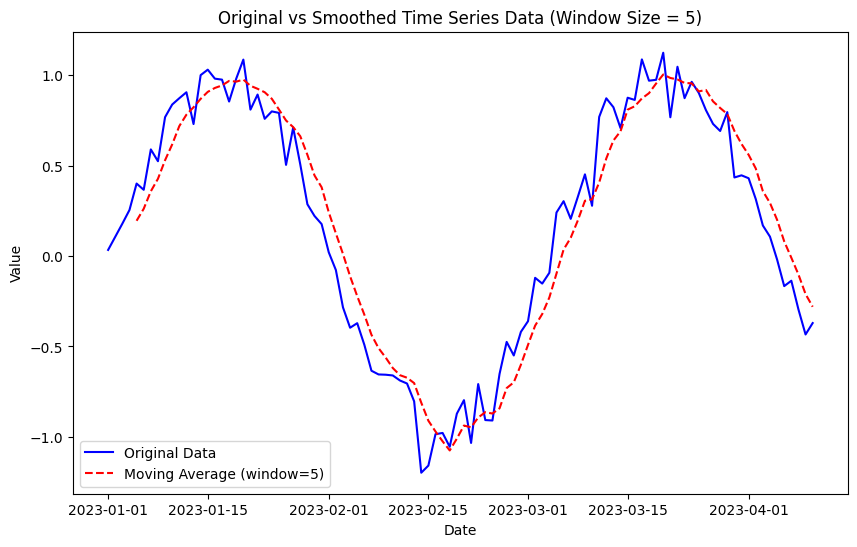

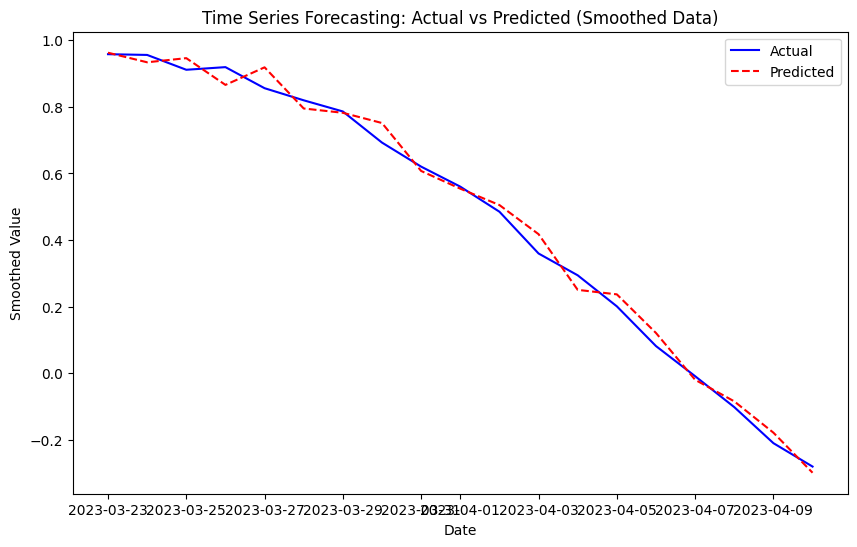

Mean Squared Error (MSE): 0.0012128743973606002
Predicted next value: -0.2986539616108166


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dates = pd.date_range('2023-01-01', periods=100, freq='D')
values = np.sin(np.linspace(0, 10, 100)) + np.random.normal(0, 0.1, 100)

data = pd.DataFrame({'Date': dates, 'Value': values})
data.set_index('Date', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(data, label='Original Data', color='blue')
plt.title("Original Time Series Data")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

window_size = 5
data['Smoothed'] = data['Value'].rolling(window=window_size).mean()

plt.figure(figsize=(10, 6))
plt.plot(data['Value'], label='Original Data', color='blue')
plt.plot(data['Smoothed'], label=f'Moving Average (window={window_size})', color='red', linestyle='--')
plt.title(f"Original vs Smoothed Time Series Data (Window Size = {window_size})")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data['Lag_1'] = data['Smoothed'].shift(1)
data['Lag_2'] = data['Smoothed'].shift(2)

data.dropna(inplace=True)

X = data[['Lag_1', 'Lag_2']]
y = data['Smoothed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='red', linestyle='--')
plt.title("Time Series Forecasting: Actual vs Predicted (Smoothed Data)")
plt.xlabel("Date")
plt.ylabel("Smoothed Value")
plt.legend()
plt.show()

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

last_lag_1 = data['Lag_1'].iloc[-1]
last_lag_2 = data['Lag_2'].iloc[-1]
next_value = model.predict([[last_lag_1, last_lag_2]])

print("Predicted next value:", next_value[0])
